In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import copy
import missingno as msno
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 150 
color = ['tomato','lightseagreen','maroon','cyan','green']
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
# 加载数据集
test_df = pd.read_csv('../data/test.csv')
train_df = pd.read_csv('../data/train.csv')


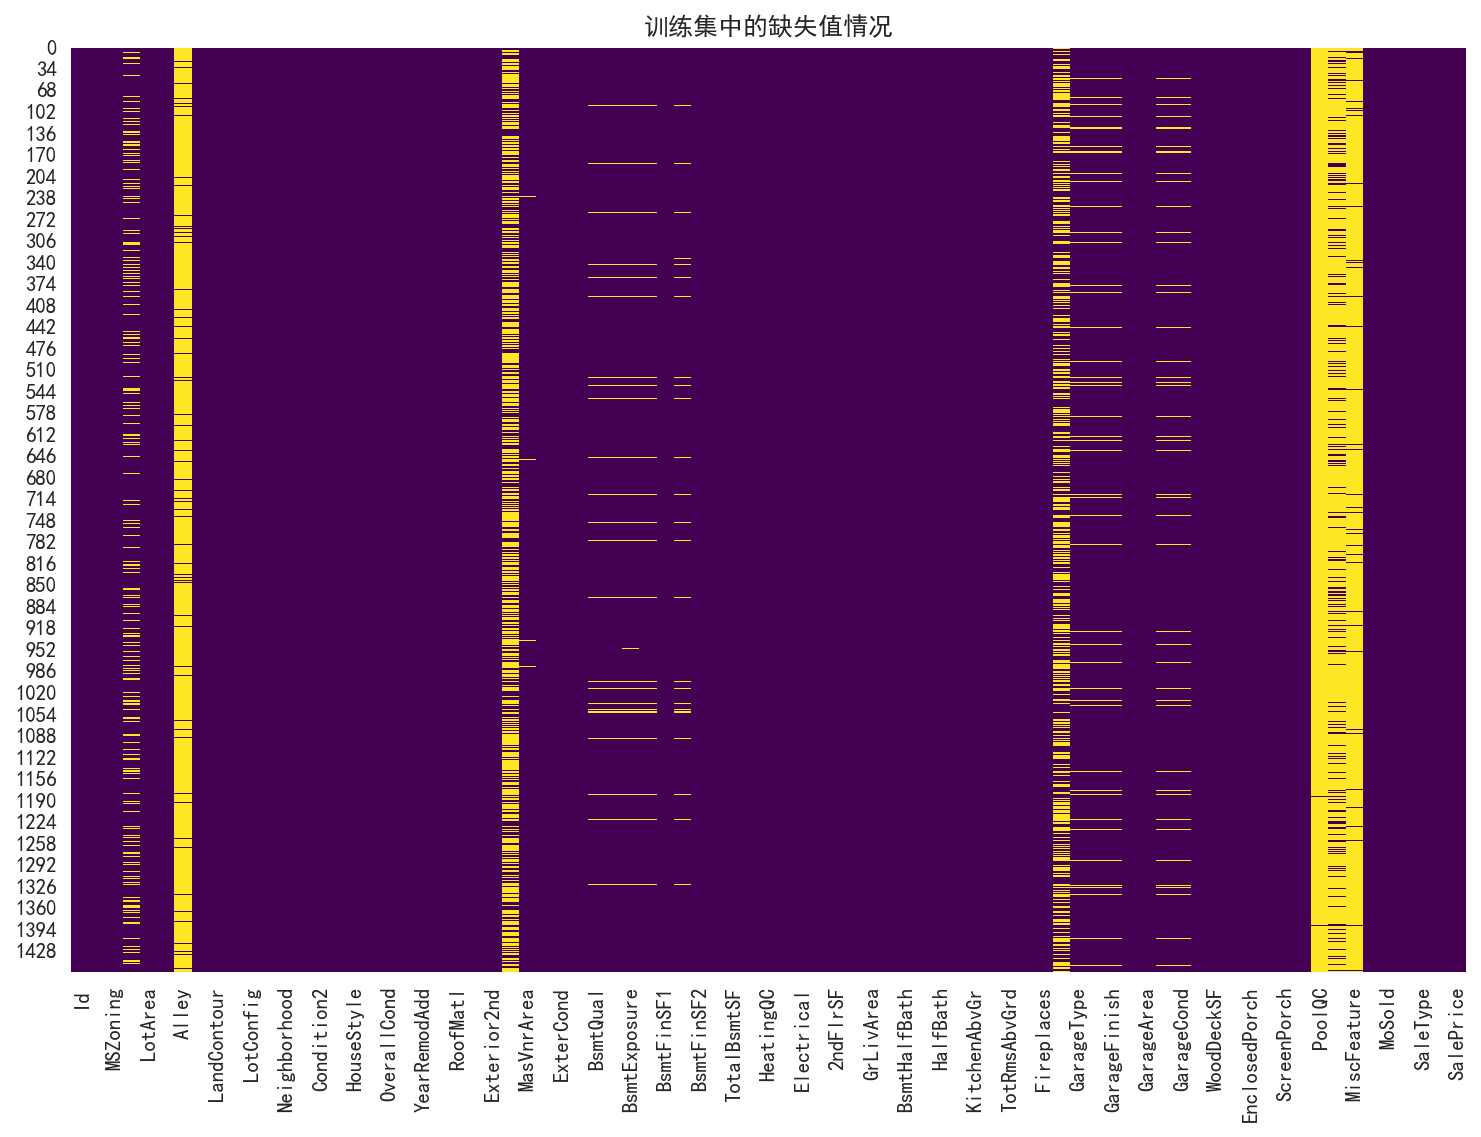

In [4]:

# 缺失值可视化
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('训练集中的缺失值情况')
plt.savefig('../images/training_missing_values.png', bbox_inches='tight')
plt.show()


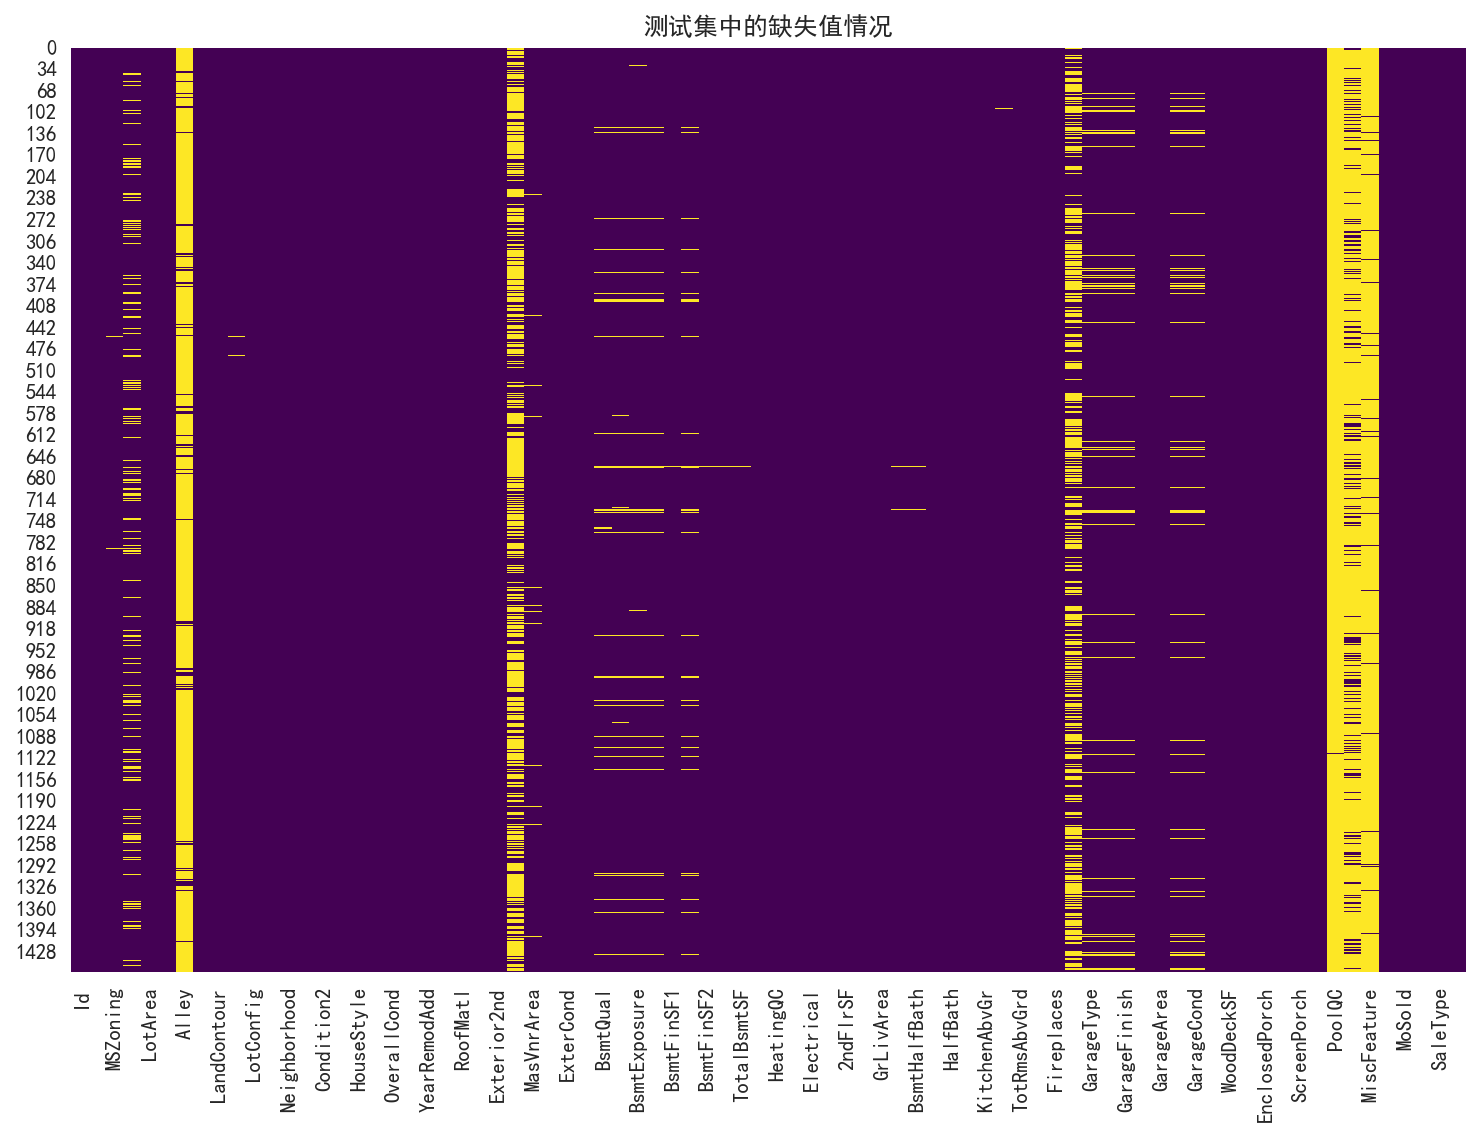

In [5]:

plt.figure(figsize=(12, 8))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title('测试集中的缺失值情况')
plt.savefig('../images/test_missing_values.png', bbox_inches='tight')
plt.show()


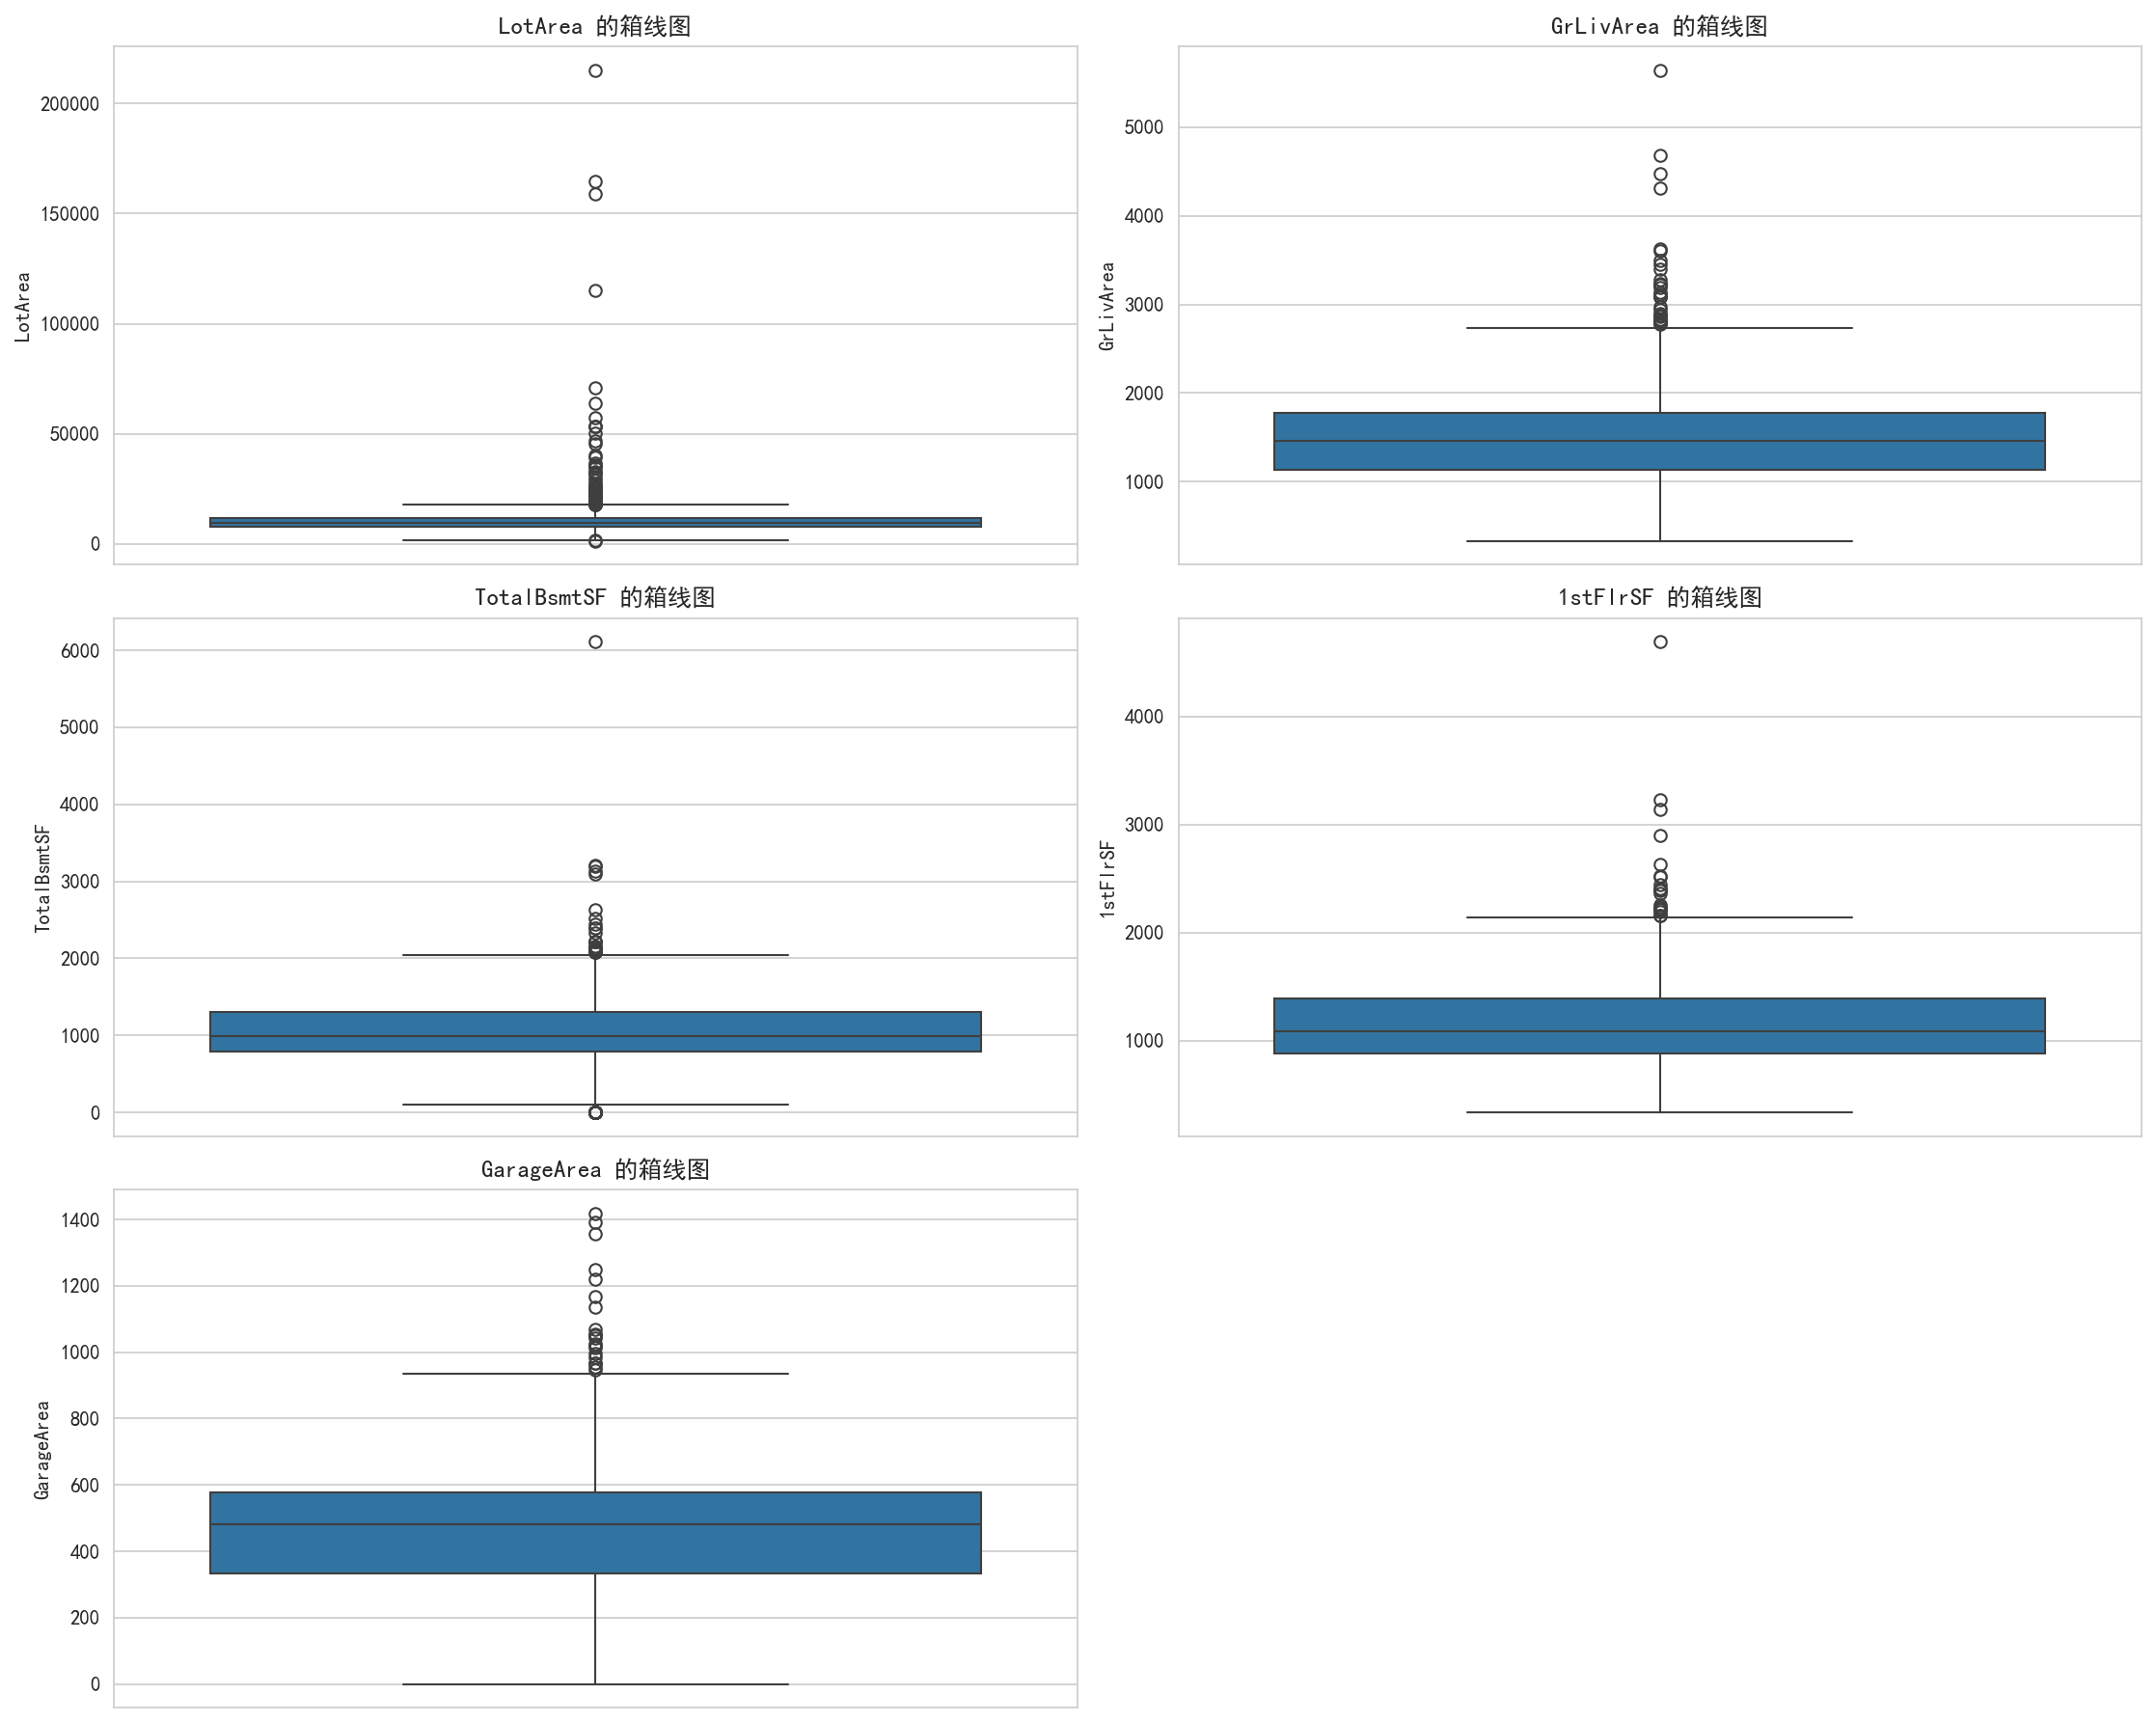

In [6]:

# 数值特征的箱线图
numerical_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=train_df[feature])
    plt.title(f'{feature} 的箱线图')
    plt.ylabel(feature)

plt.tight_layout()
plt.savefig('../images/numerical_features_boxplot.png', bbox_inches='tight')
plt.show()


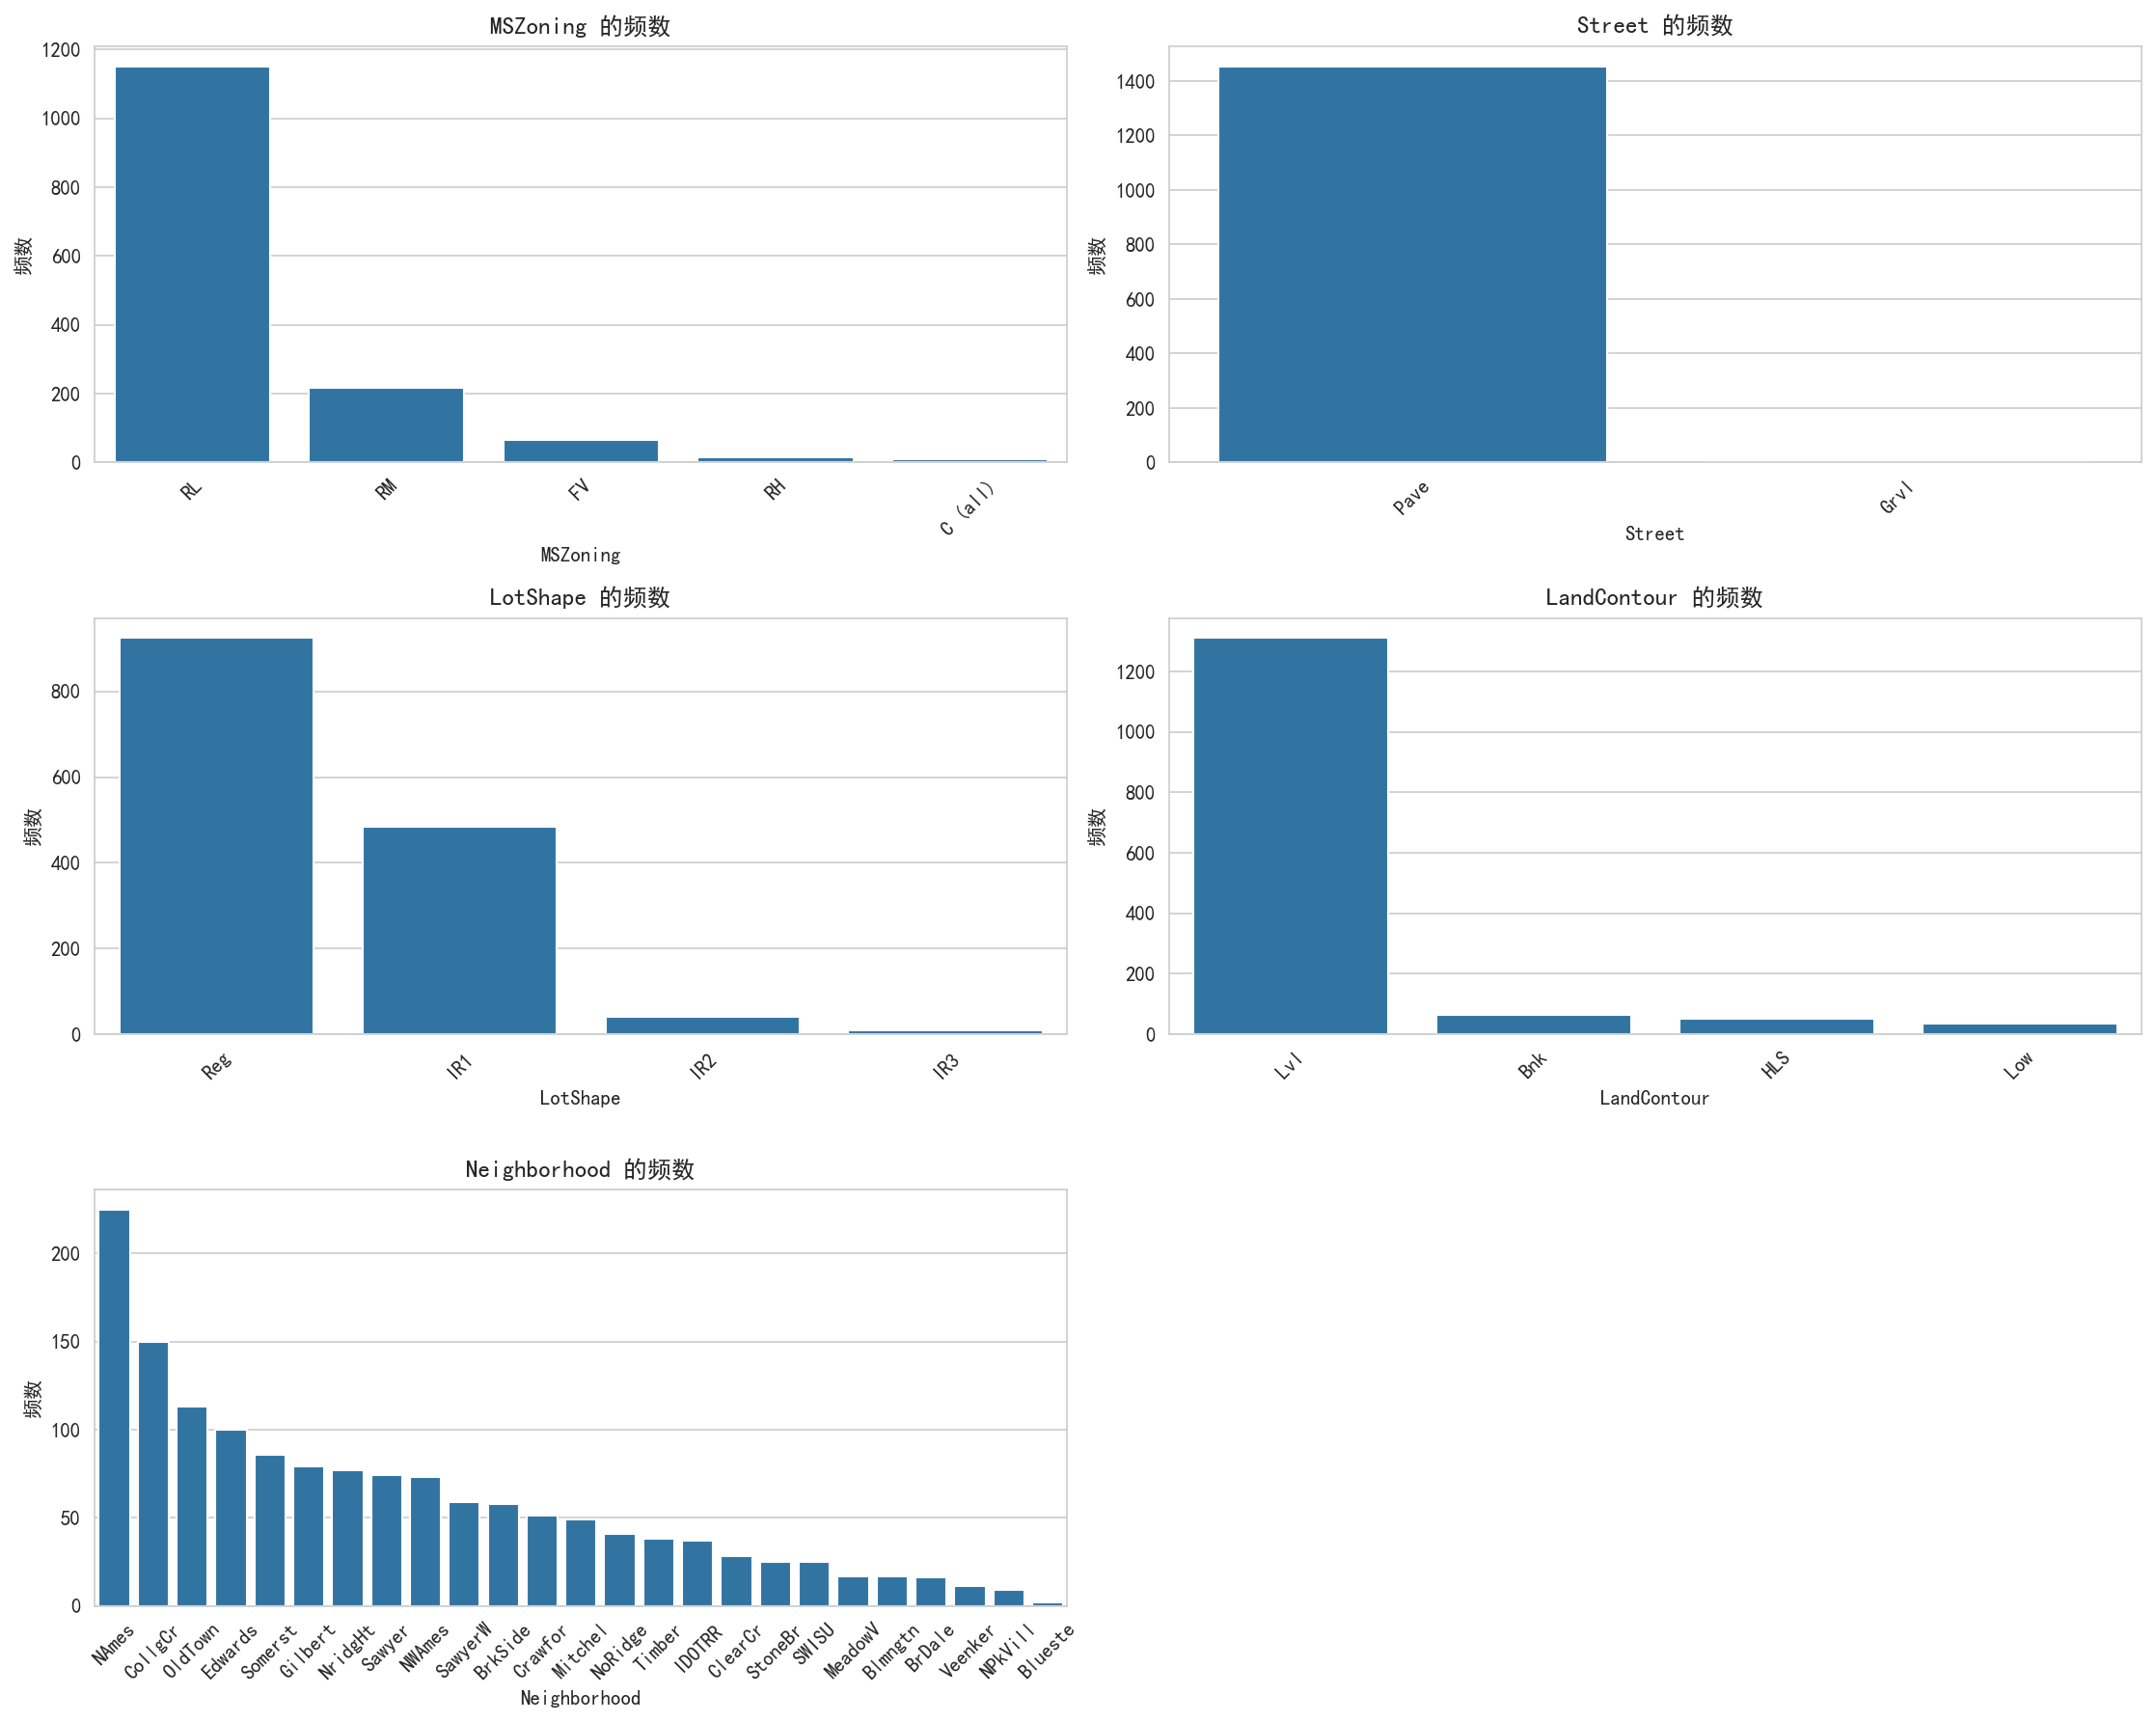

In [7]:

# 类别特征的条形图
categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Neighborhood']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index)
    plt.title(f'{feature} 的频数')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel('频数')

plt.tight_layout()
plt.savefig('../images/categorical_features_barplot.png', bbox_inches='tight')
plt.show()


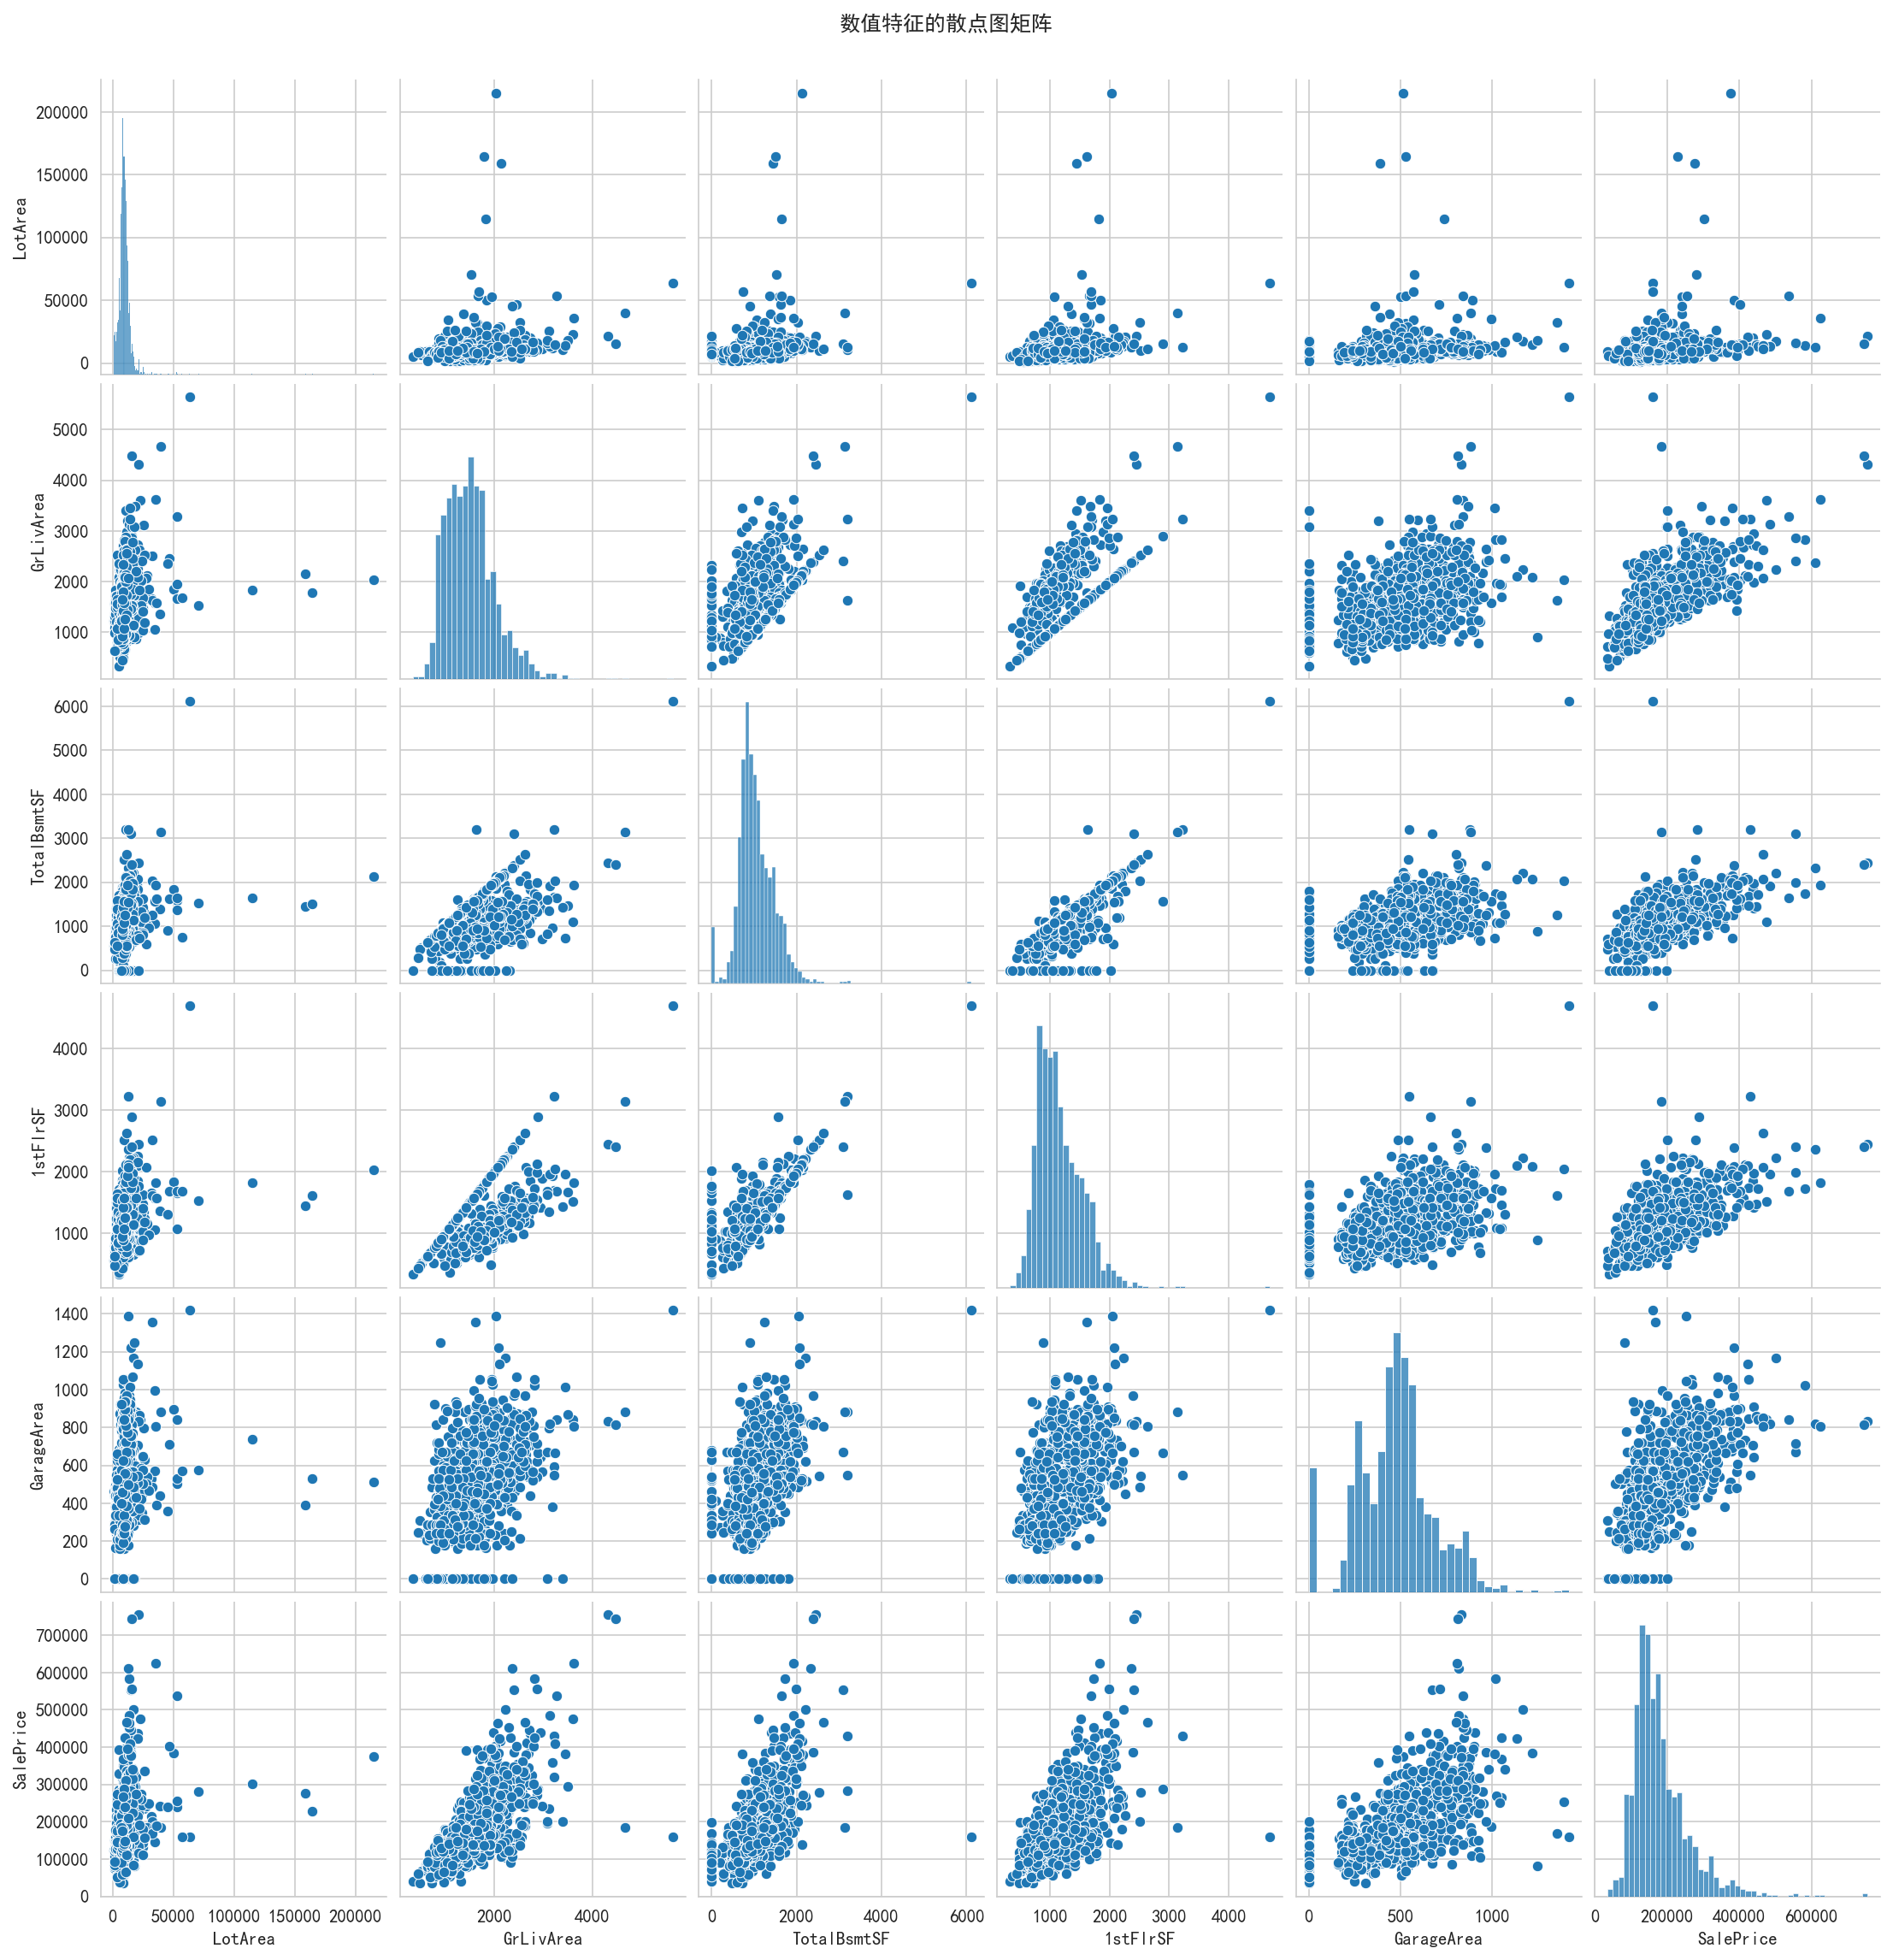

In [8]:

# 数值特征的散点图矩阵
sns.pairplot(train_df[numerical_features + ['SalePrice']])
plt.suptitle('数值特征的散点图矩阵', y=1.02)
plt.savefig('../images/scatter_matrix.png', bbox_inches='tight')
plt.show()


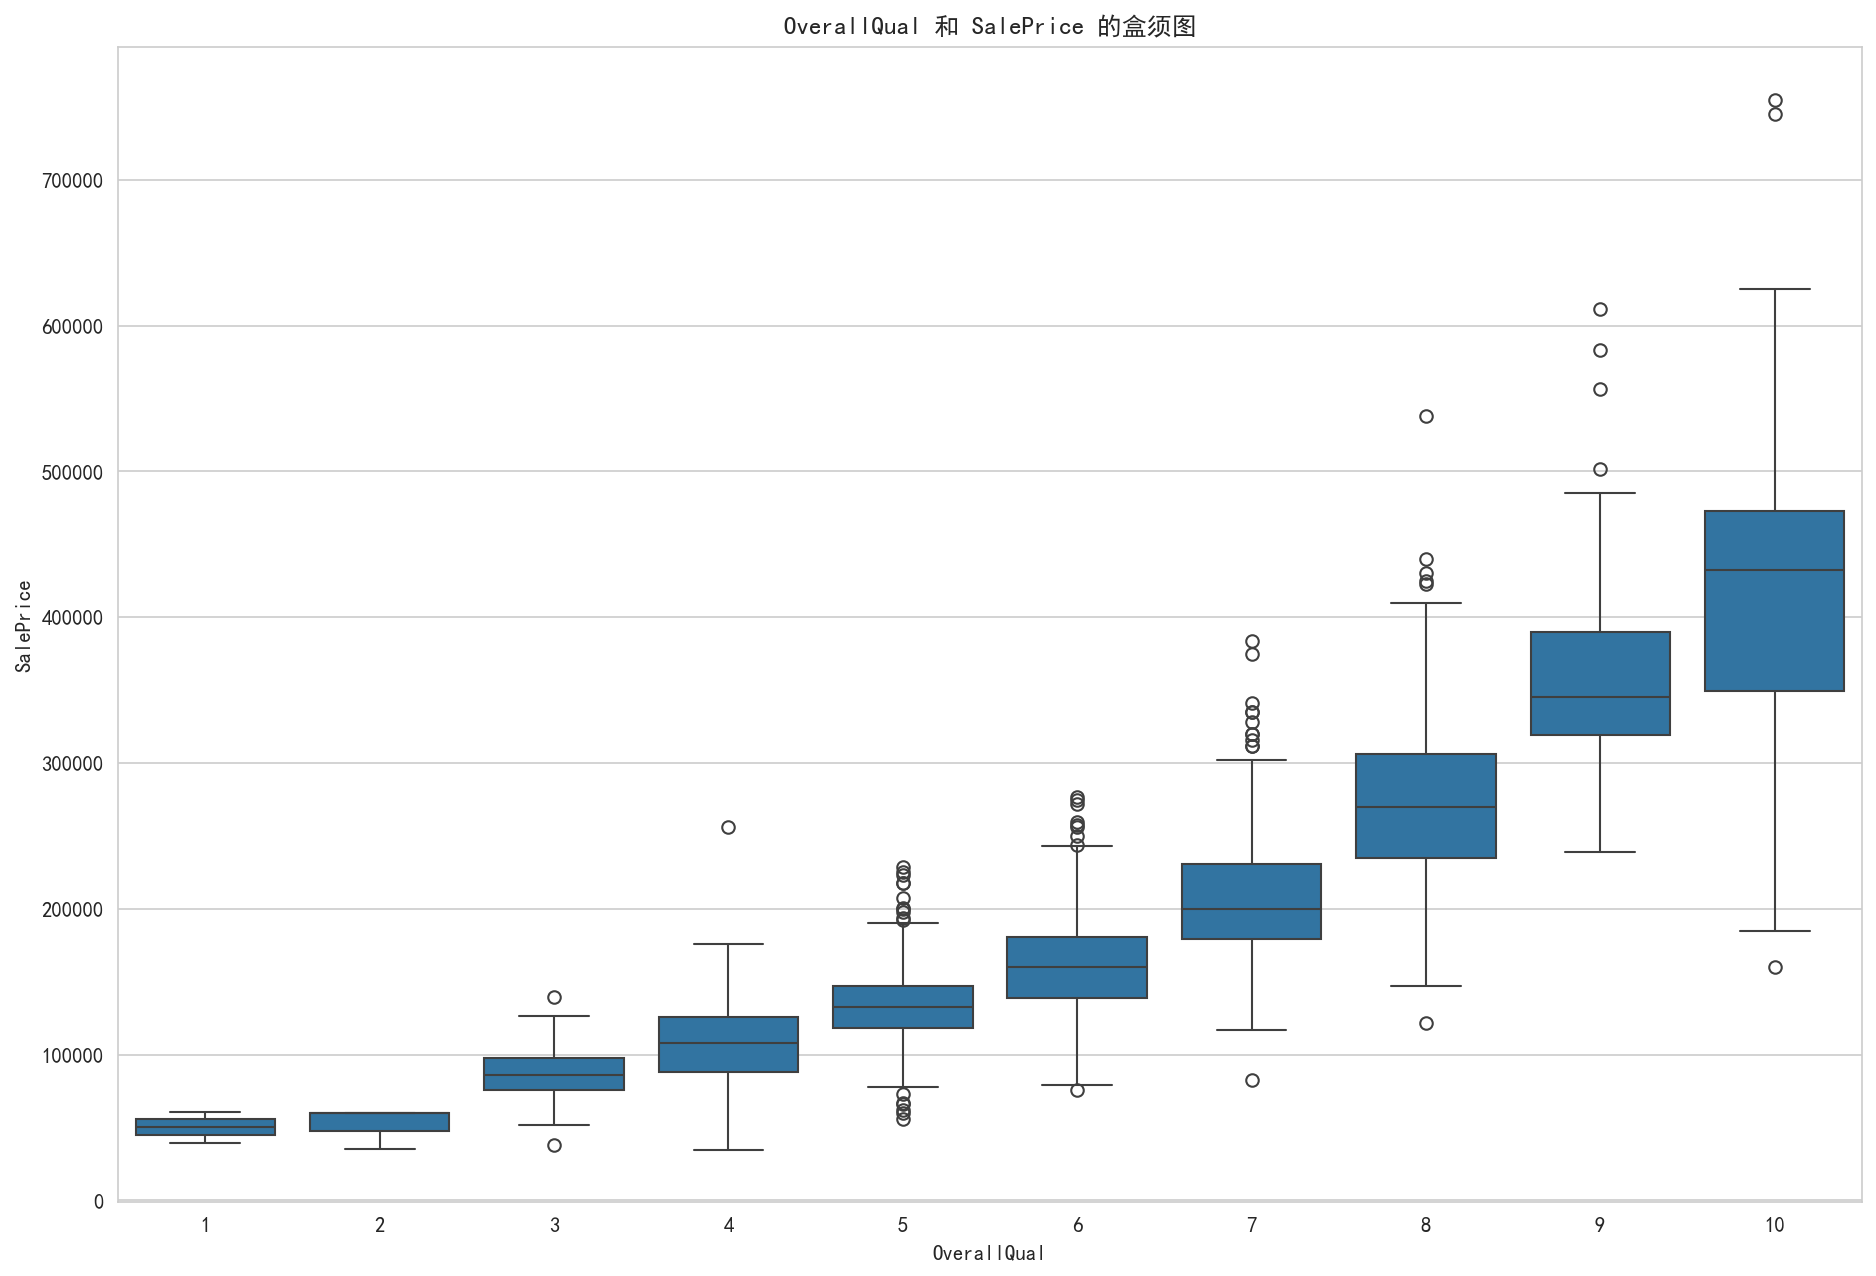

In [9]:

# 类别特征与目标变量的盒须图
plt.figure(figsize=(15, 10))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('OverallQual 和 SalePrice 的盒须图')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.savefig('../images/overallqual_saleprice.png', bbox_inches='tight')
plt.show()


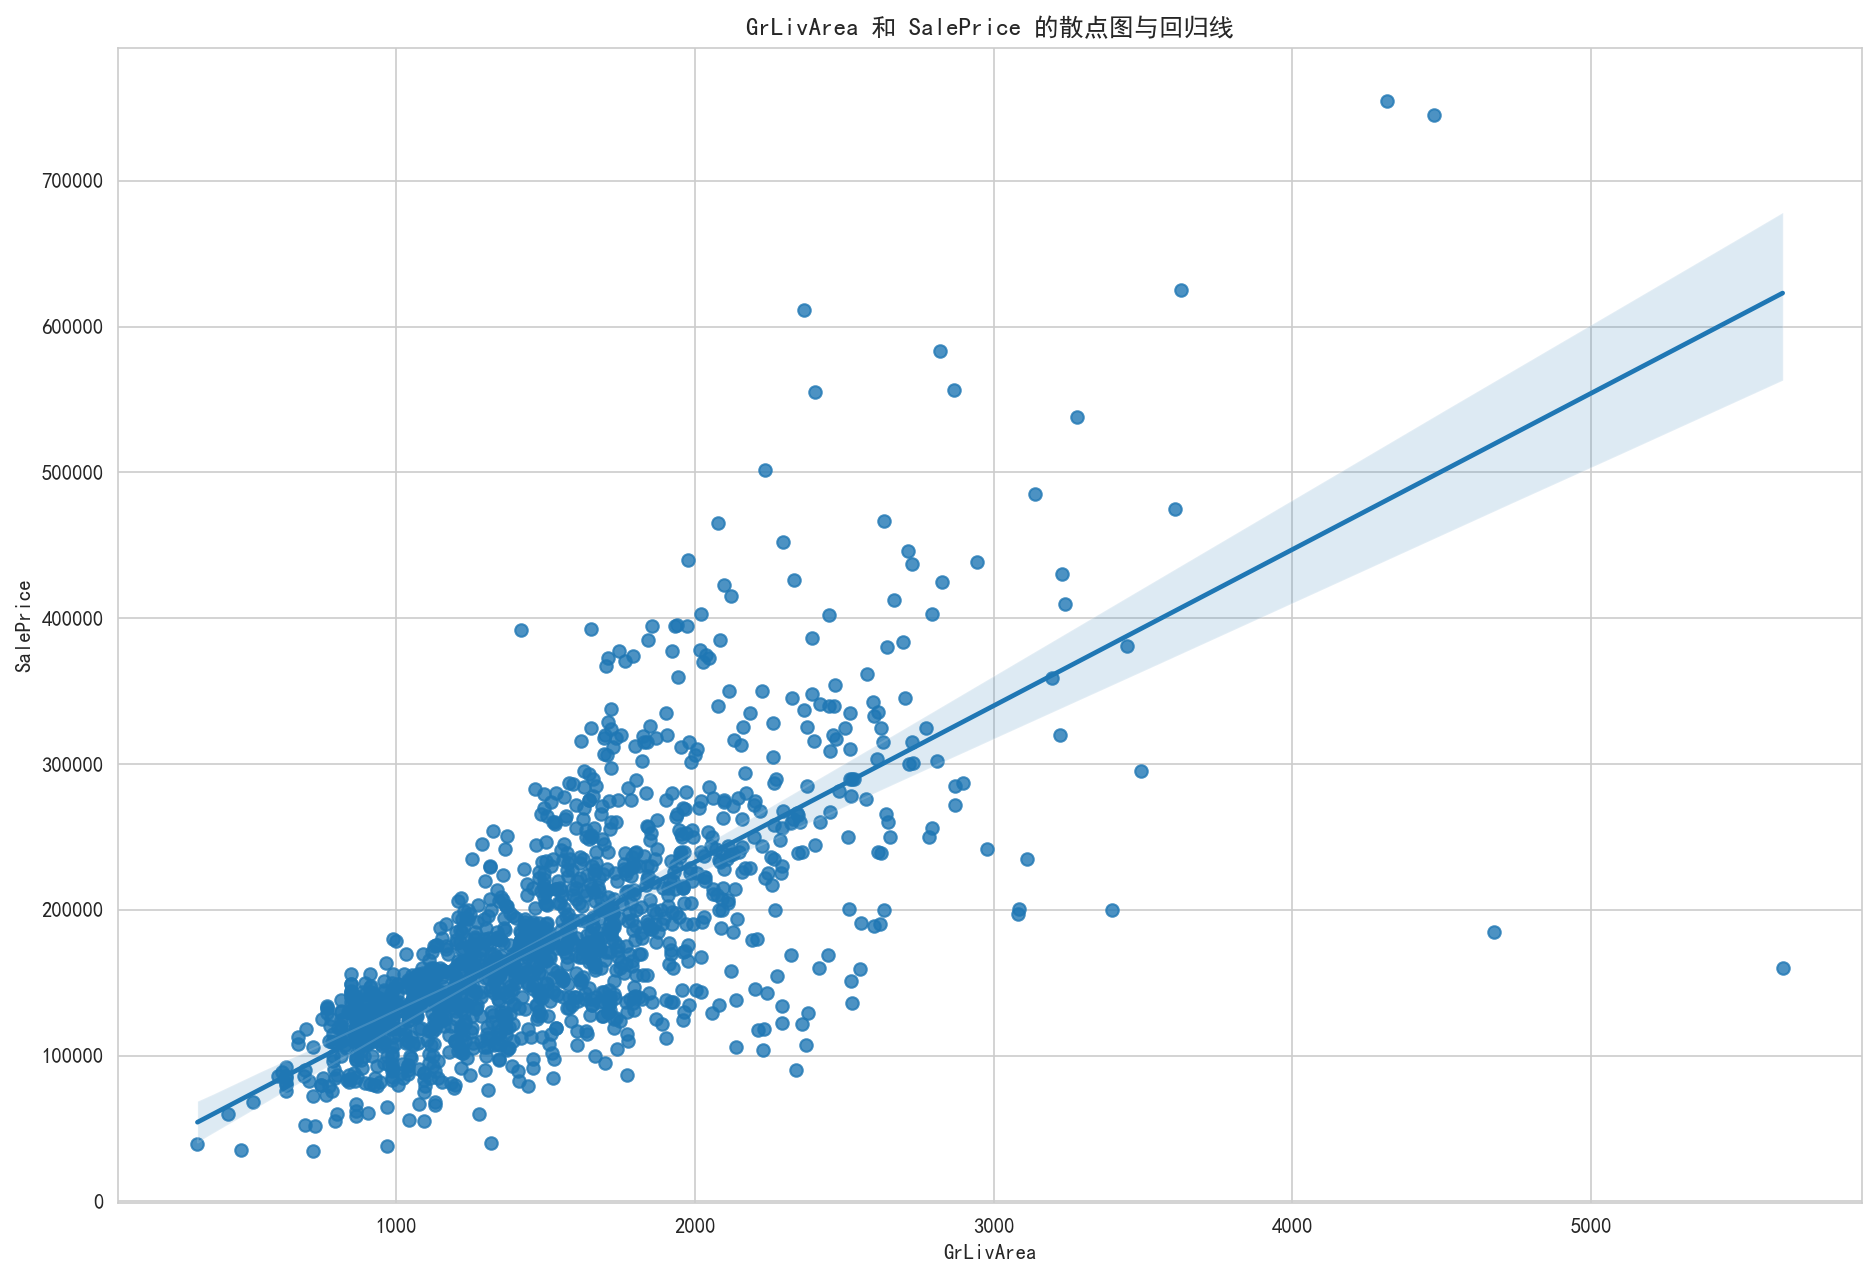

In [10]:

# 散点图和回归线
plt.figure(figsize=(15, 10))
sns.regplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('GrLivArea 和 SalePrice 的散点图与回归线')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.savefig('../images/grlivarea_saleprice.png', bbox_inches='tight')
plt.show()


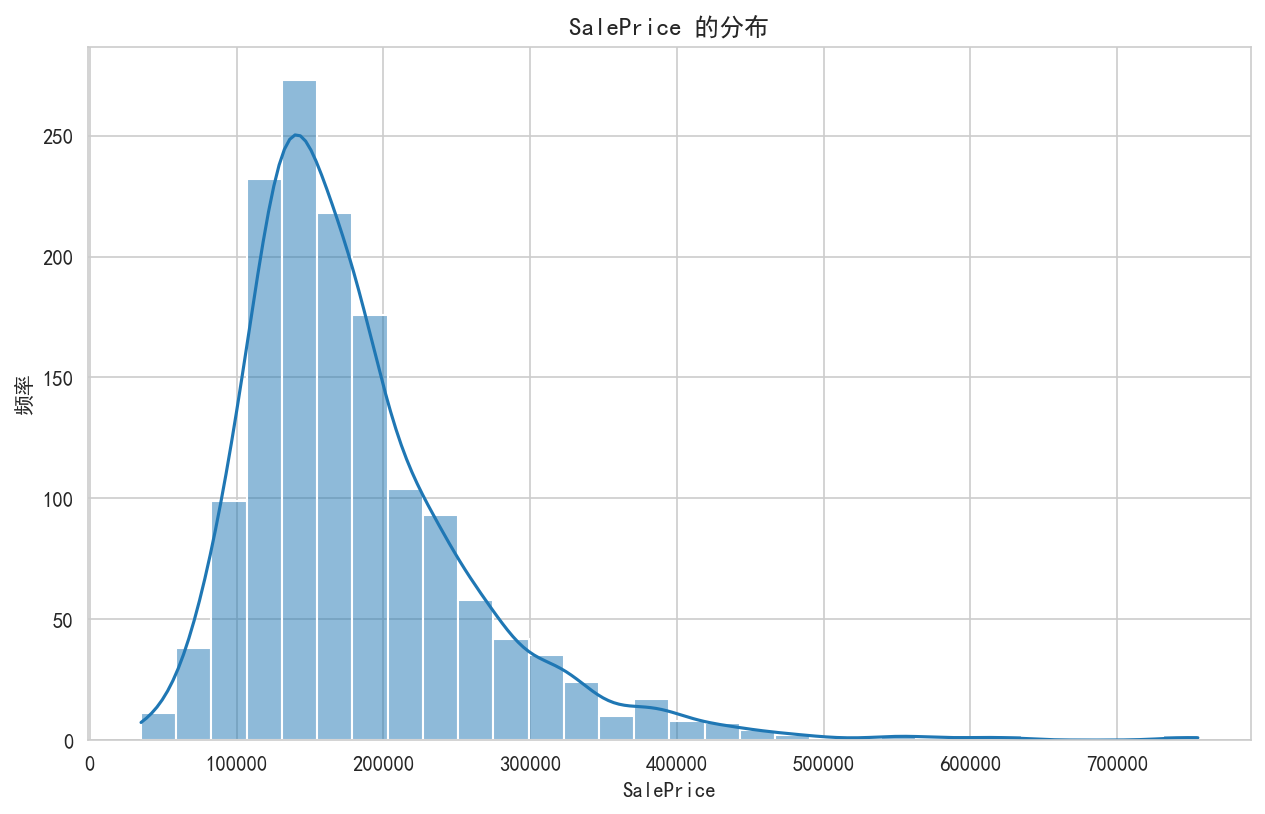

In [11]:

# 目标变量的分布图
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=30)
plt.title('SalePrice 的分布')
plt.xlabel('SalePrice')
plt.ylabel('频率')
plt.savefig('../images/saleprice_distribution.png', bbox_inches='tight')
plt.show()
